## Linear Regression Implementation ##
In this notebook, we'll implement linear regression from scratch using gradient descent. We'll cover each step of the process, from data generation to model training and visualization.
1. Setup and Data Generation
First, let's import our required libraries and generate some sample data.

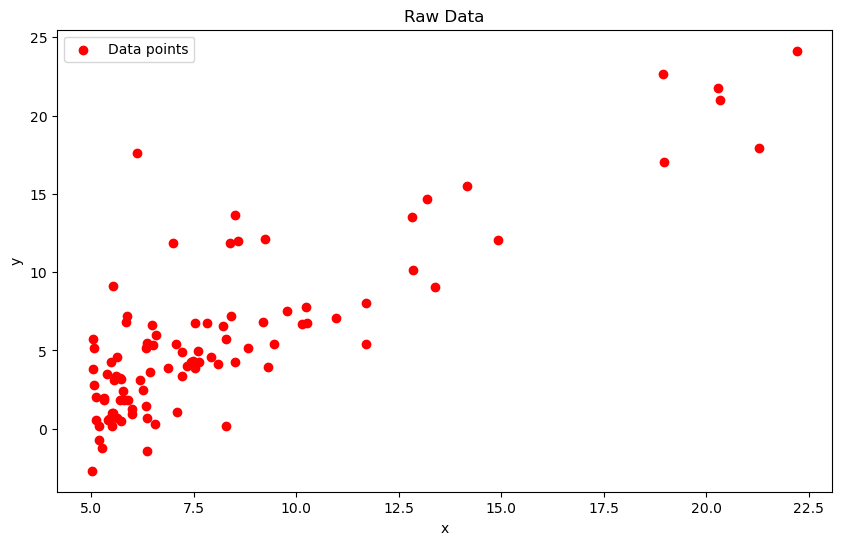

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
# x_train = np.linspace(0, 10, 100)
# y_train = 2 * x_train + 1 + np.random.normal(0, 1, 100)
x_train, y_train = load_data()
# Visualize the raw data
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='red', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Raw Data')
plt.legend()
plt.show()

### 2. Cost Function Implementation ###
The cost function measures how well our current model parameters fit the data. We'll use the Mean Squared Error (MSE) cost function.

In [3]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input features
        y (ndarray): Shape (m,) Actual values
        w, b (scalar): Parameters of the model
    
    Returns:
        total_cost (float): The cost of using w,b as the parameters
    """
    m = x.shape[0]
    total_cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        total_cost += (f_wb - y[i])**2
    
    total_cost = total_cost / (2 * m)
    return total_cost

# Test the cost function
initial_cost = compute_cost(x_train, y_train, w=0, b=0)
print(f"Initial cost with w=0, b=0: {initial_cost:.2f}")

Initial cost with w=0, b=0: 32.07


### 3. Gradient Computation ###
The gradient tells us how to update our parameters to reduce the cost.

In [4]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input features
        y (ndarray): Shape (m,) Actual values
        w, b (scalar): Parameters of the model
    
    Returns:
        dj_dw (scalar): Gradient with respect to w
        dj_db (scalar): Gradient with respect to b
    """
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

# Test the gradient computation
initial_dj_dw, initial_dj_db = compute_gradient(x_train, y_train, w=0, b=0)
print(f"Initial gradients with w=0, b=0:")
print(f"dj_dw: {initial_dj_dw:.2f}")
print(f"dj_db: {initial_dj_db:.2f}")

Initial gradients with w=0, b=0:
dj_dw: -65.33
dj_db: -5.84


### 4. Gradient Descent Implementation ###
Now we'll implement the full gradient descent algorithm to find the optimal parameters.

In [5]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iters):
    """
    Performs gradient descent to learn w and b.
    
    Args:
        x (ndarray): Shape (m,) Input features
        y (ndarray): Shape (m,) Actual values
        w_init, b_init (scalar): Initial values of parameters
        alpha (float): Learning rate
        num_iters (int): Number of iterations
    
    Returns:
        w (scalar): Updated value of parameter w
        b (scalar): Updated value of parameter b
        J_history (list): History of cost values
    """
    w = w_init
    b = b_init
    J_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i % 100 == 0:
            cost = compute_cost(x, y, w, b)
            J_history.append(cost)
            print(f"Iteration {i}: Cost {cost:.2f}")
    
    return w, b, J_history

### 5. Model Training ###
Let's train our model using gradient descent.

In [6]:
# Initialize parameters
initial_w = 0
initial_b = 0
iterations = 1500
alpha = 0.01

# Train the model
w_final, b_final, J_history = gradient_descent(x_train, y_train, 
                                             initial_w, initial_b, 
                                             alpha, iterations)

print(f"\nFinal parameters:")
print(f"w = {w_final:.4f}")
print(f"b = {b_final:.4f}")
print(f"True parameters: w = 2, b = 1")

Iteration 0: Cost 6.74
Iteration 100: Cost 5.48
Iteration 200: Cost 5.17
Iteration 300: Cost 4.96
Iteration 400: Cost 4.82
Iteration 500: Cost 4.71
Iteration 600: Cost 4.64
Iteration 700: Cost 4.59
Iteration 800: Cost 4.56
Iteration 900: Cost 4.53
Iteration 1000: Cost 4.52
Iteration 1100: Cost 4.50
Iteration 1200: Cost 4.50
Iteration 1300: Cost 4.49
Iteration 1400: Cost 4.49

Final parameters:
w = 1.1664
b = -3.6303
True parameters: w = 2, b = 1


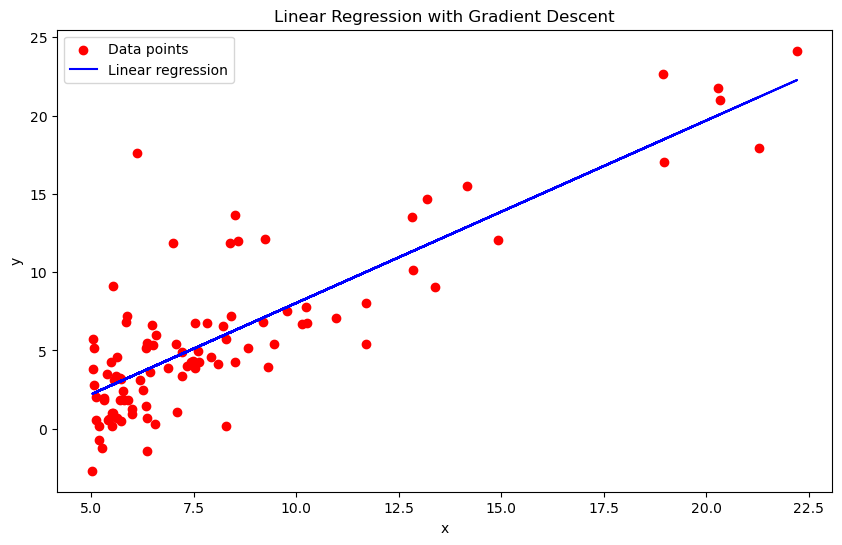

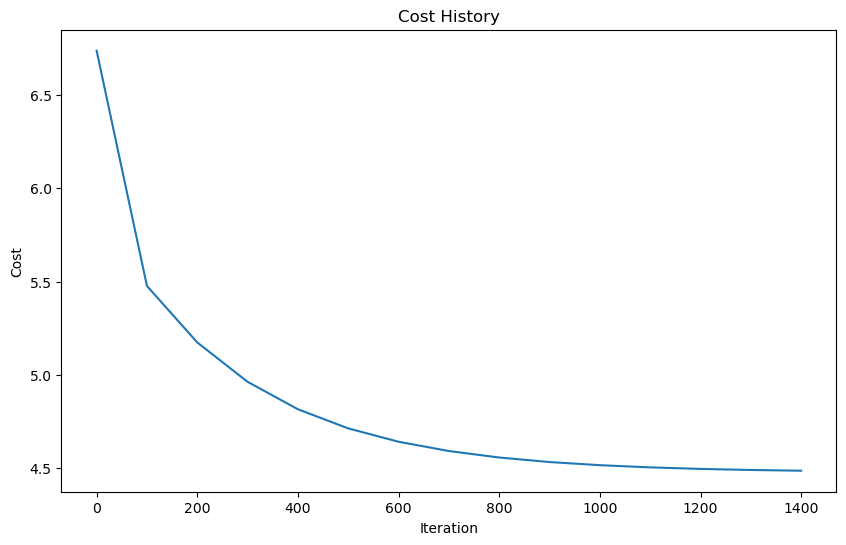

In [7]:
# Make predictions
y_pred = w_final * x_train + b_final

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='red', label='Data points')
plt.plot(x_train, y_pred, color='blue', label='Linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()

# Plot cost history
plt.figure(figsize=(10, 6))
plt.plot(range(0, iterations, 100), J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

In [8]:
# Example predictions
test_points = np.array([2, 4, 6])
predictions = w_final * test_points + b_final

print("\nPredictions for x = [2, 4, 6]:")
for x, pred in zip(test_points, predictions):
    print(f"x = {x}: predicted y = {pred:.2f}")


Predictions for x = [2, 4, 6]:
x = 2: predicted y = -1.30
x = 4: predicted y = 1.04
x = 6: predicted y = 3.37


### Conclusion ###
We've successfully implemented linear regression from scratch! Our model learned the relationship between x and y, finding parameters close to the true values (w=2, b=1) that we used to generate the data.
To use this notebook with your own data:

Replace the data generation step with your own x_train and y_train arrays
Adjust the hyperparameters (learning rate and iterations) if needed
Run all cells to train and evaluate the model